In [1]:
#引入库
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']
matplotlib.rcParams['axes.unicode_minus']=False

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
plt.rcParams['font.sans-serif']=['simhei']
plt.rcParams['font.serif'] = ['simhei']

import warnings
warnings.filterwarnings('ignore')
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\SimHei.ttf',size=12)
sns.set(font=myfont.get_name())

In [2]:
#数据读取，并打印前4行
df = pd.read_csv('学习态度维度.csv')

In [3]:
#数据处理：缺失值检查,false即表示无缺失值,若对行处理则令axis=1
print(df.isnull().any())

personid        False
score           False
consume_time    False
dtype: bool


In [4]:
#数据处理：去除重复值,使用drop_duplicates函数，输出为重复值数
df.duplicated().sum()

0

In [5]:
#基于pyspark的数据统计分析，此处仅使用描述分析与频率统计
#mean()函数或describe()函数对均值进行描述统计.T表示矩阵逆置，行输出
df.describe().T

,count,mean,std,min,25%,50%,75%,max
personid,243.0000,129480950.0700,25868008.7015,51455892.0000,111945908.0000,111948913.0000,147388816.5000,197263536.0000
score,243.0000,48.7458,23.7102,0.0300,41.8750,51.5600,59.6750,92.7200
consume_time,243.0000,17.1092,15.4809,0.0400,5.7050,12.8800,24.3650,67.6400


In [6]:
#rename，更改列名以方便可视化展现
df.rename(columns={'personid':'学生编号','score':'分数','consume_time':'完成作业耗时'},inplace=True)
df

,学生编号,分数,完成作业耗时
0,51455892,59.9000,8.1300
1,51466294,70.6100,20.1800
2,67695313,75.1600,36.6100
3,67697725,78.5400,11.8300
4,68286748,47.9200,23.9100
...,...,...,...
238,197259586,88.8800,4.4200
239,197259971,90.8600,4.8400
240,197261324,90.1600,38.9700
241,197261517,92.2100,38.0100


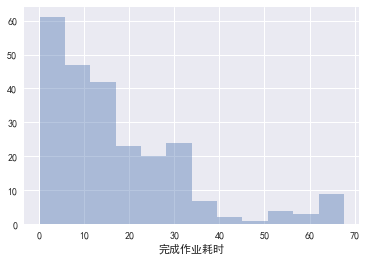

In [7]:
sns.distplot(df["完成作业耗时"],kde=False)
plt.show()

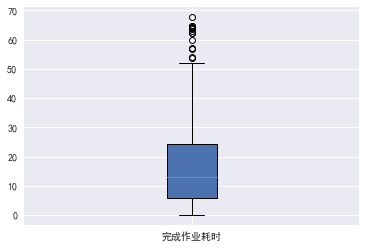

In [8]:
d1 = df['完成作业耗时']
# 横坐标，显示均值
plt.boxplot(d1,patch_artist=True,labels=['完成作业耗时'])
plt.show()

In [9]:
# 箱型图判断异常点
def box_outlier(data):
    df = data.copy(deep=True)
    out_index = []
    for col in df.columns:             # 对每一列分别用箱型图进行判断
        Q1 = df[col].quantile(q=0.25)       # 下四分位
        Q3 = df[col].quantile(q=0.75)       # 上四分位
        low_whisker = Q1 - 1.5 * (Q3 - Q1)  # 下边缘
        up_whisker = Q3 + 1.5 * (Q3 - Q1)   # 上边缘
        
        # 寻找异常点,获得异常点索引值，删除索引值所在行数据
        rule = (df[col] > up_whisker) | (df[col] < low_whisker)  
        out = df[col].index[rule]
        out_index += out.tolist()  
    df.drop(out_index, inplace=True)
    return df

df_clean = box_outlier(df)
df_clean

,学生编号,分数,完成作业耗时
2,67695313,75.1600,36.6100
3,67697725,78.5400,11.8300
4,68286748,47.9200,23.9100
5,73095160,39.4500,7.8300
6,98289131,77.1600,28.6400
...,...,...,...
224,147393726,54.4600,13.5200
225,147393731,51.4900,3.4100
226,147393768,52.8900,34.0000
227,147393863,24.8200,5.4000


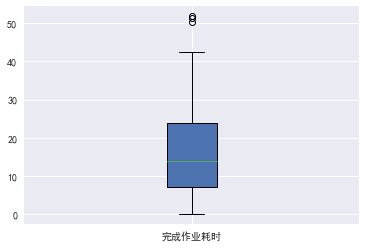

In [10]:
d1_clean = df_clean['完成作业耗时']
# 横坐标，显示均值
plt.boxplot(d1_clean,patch_artist=True,labels=['完成作业耗时'])
plt.show()

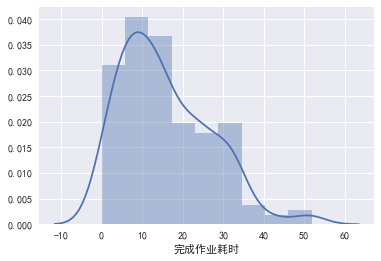

In [11]:
# 单变量分布直方图
# kde核密度走势图，rug胡须下线，线越多表示数量越密
sns.distplot(df_clean["完成作业耗时"],kde = True,label = '频率')
plt.show()

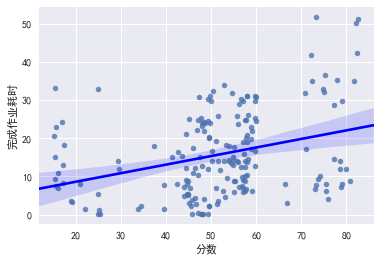

In [14]:
# 线性回归关系图
sns.regplot(x='分数',y='完成作业耗时',data=df_clean,scatter_kws={'marker':'.','s':30},line_kws={'color':'b'})